## 3. EDA

<class 'pandas.core.frame.DataFrame'>
Index: 48842 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Edad                 48842 non-null  int64 
 1   Clase_Obrera         48842 non-null  object
 2   Peso_final           48842 non-null  int64 
 3   Educación            48842 non-null  object
 4   Nivel_Educativo      48842 non-null  int64 
 5   Estado_Civil         48842 non-null  object
 6   Ocupación            48842 non-null  object
 7   Relación             48842 non-null  object
 8   Raza                 48842 non-null  object
 9   Sexo                 48842 non-null  object
 10  Ganancia_de_capital  48842 non-null  int64 
 11  Pérdida_de_capital   48842 non-null  int64 
 12  Horas_semanales      48842 non-null  int64 
 13  País_de_origen       48842 non-null  object
 14  Ingresos             48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB

Valores únic

C:\Users\modos\AppData\Local\Temp\ipykernel_13144\2286586712.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=missing_columns.index, y=missing_columns.values, palette="viridis")


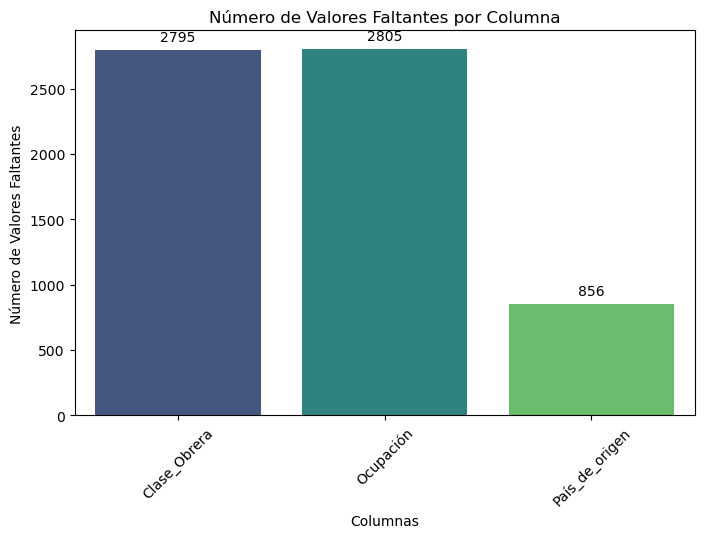

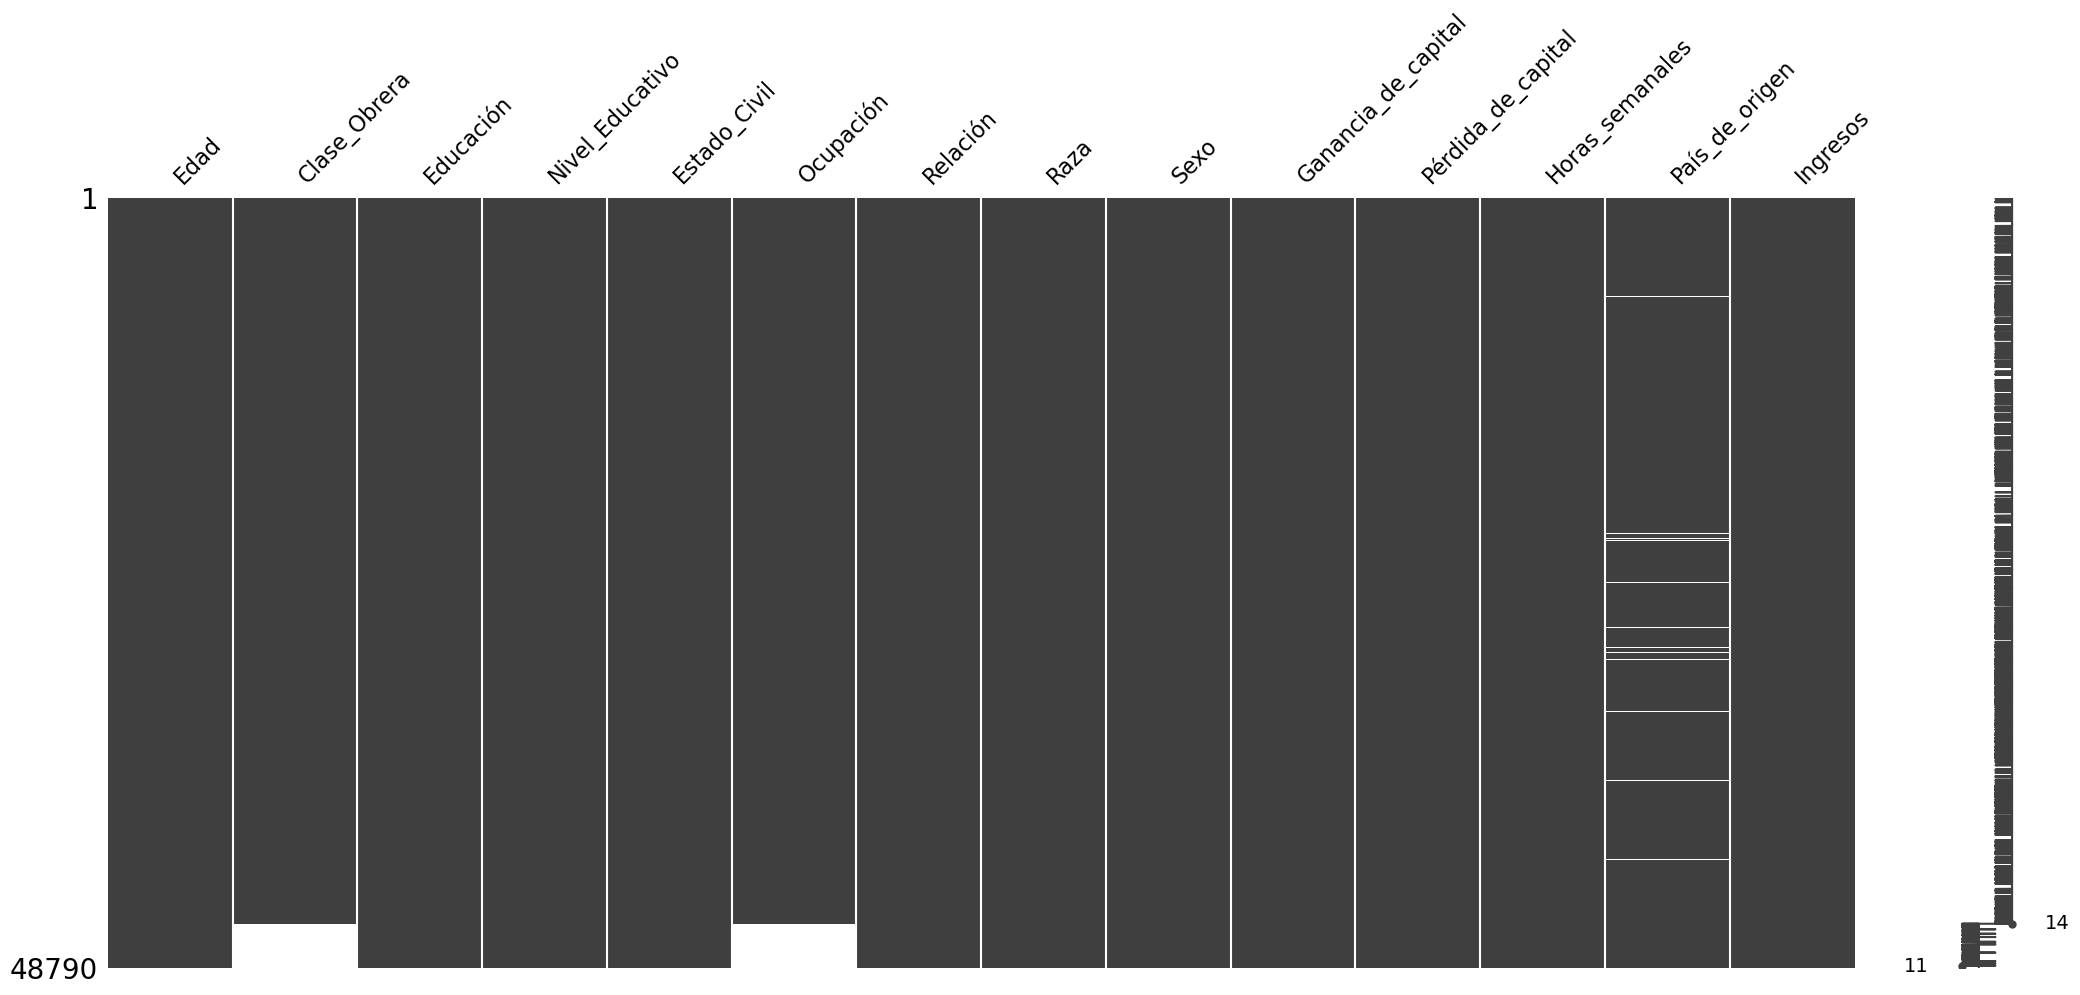

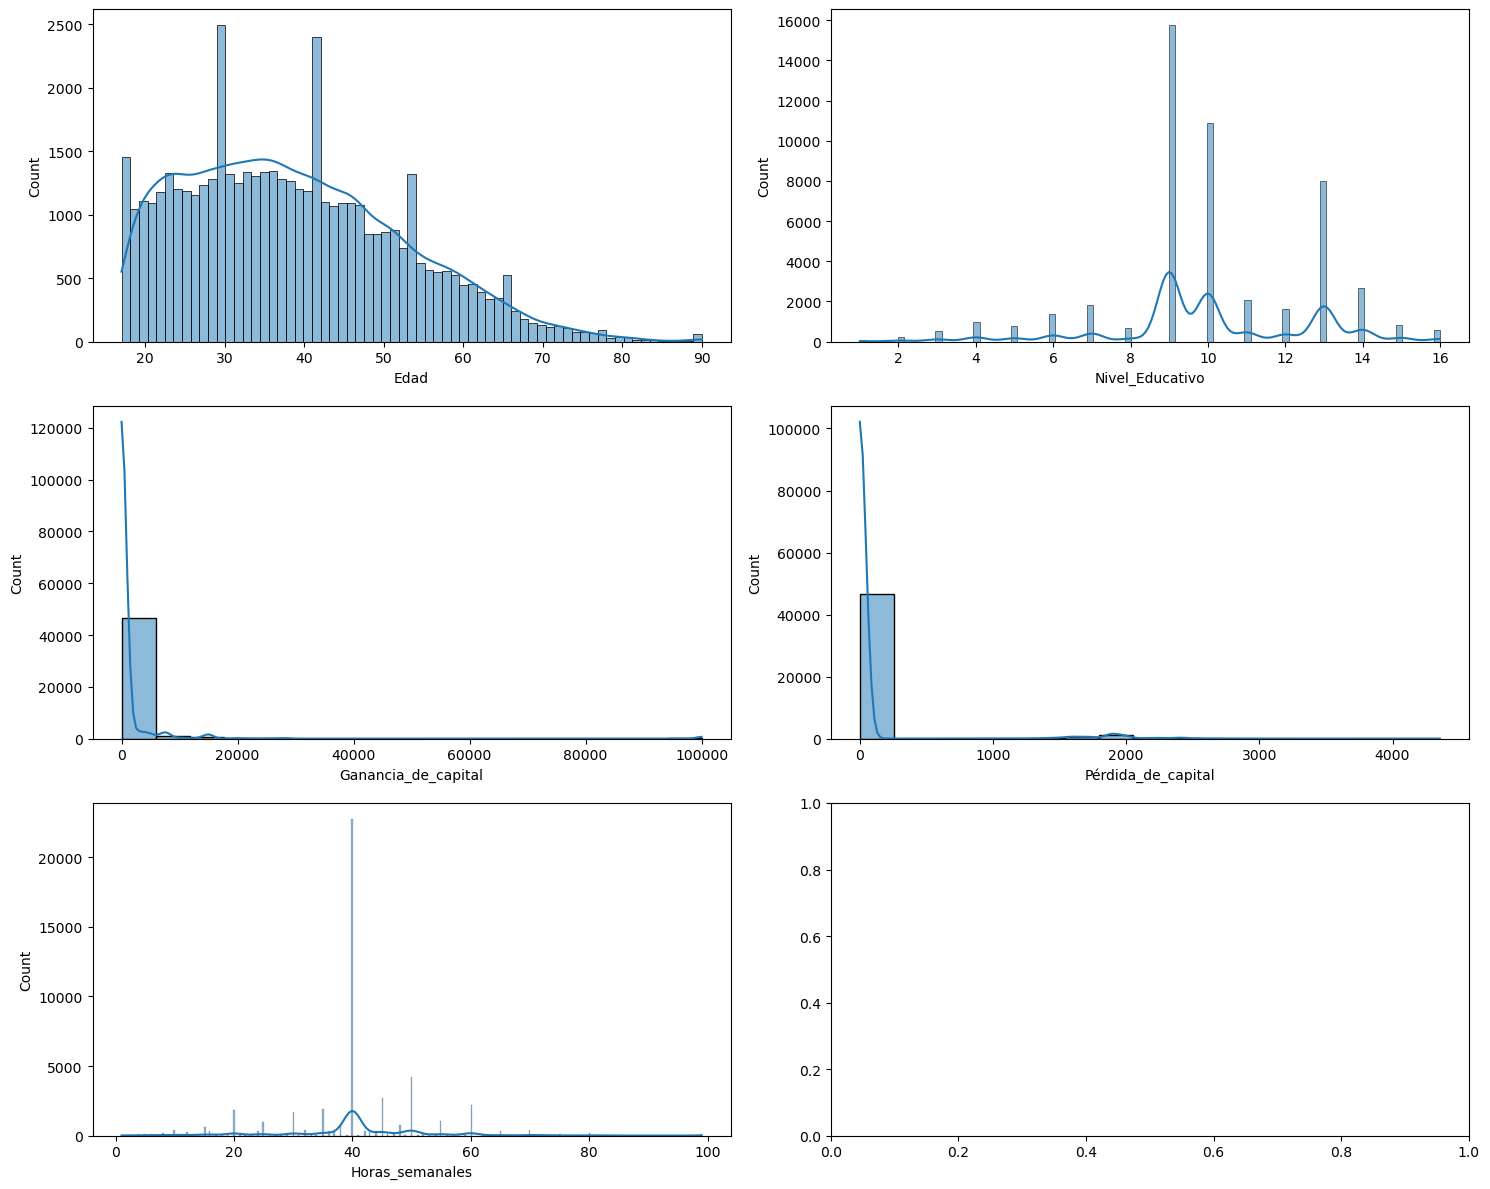

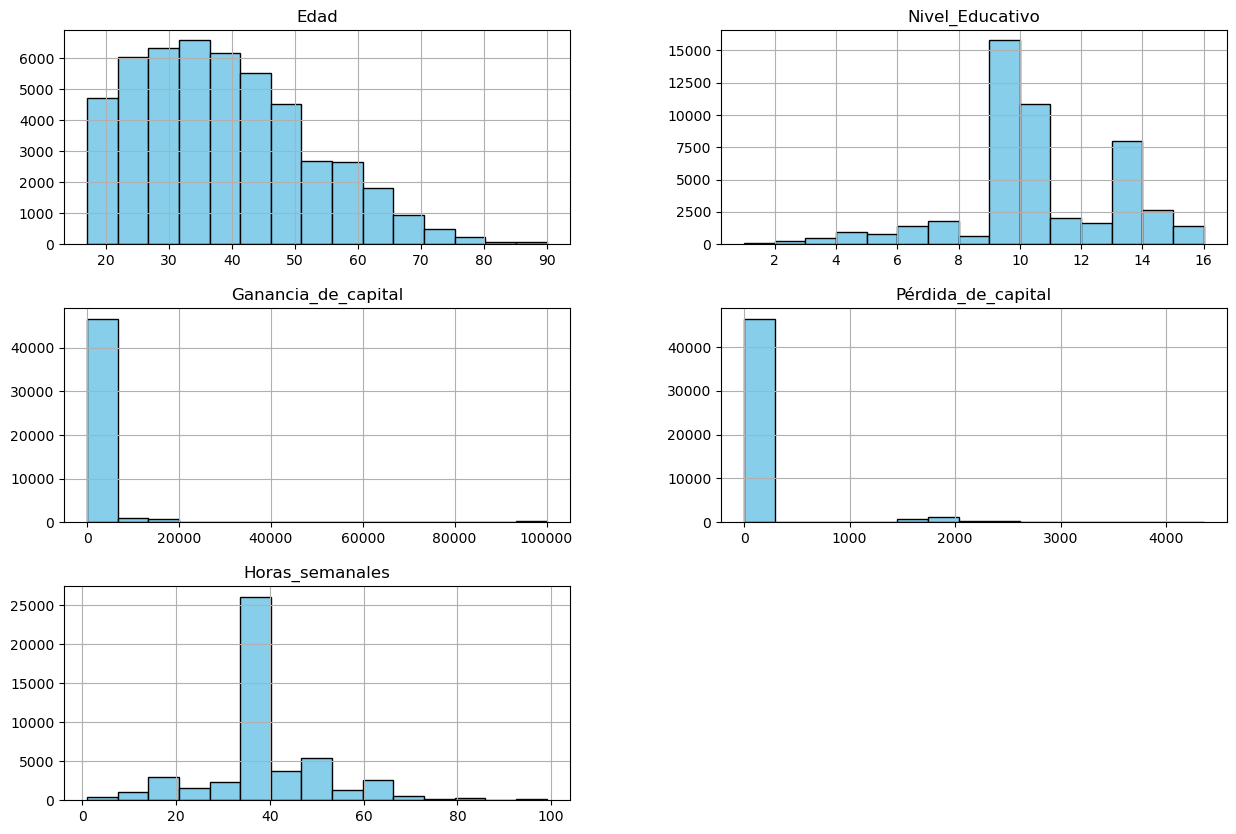

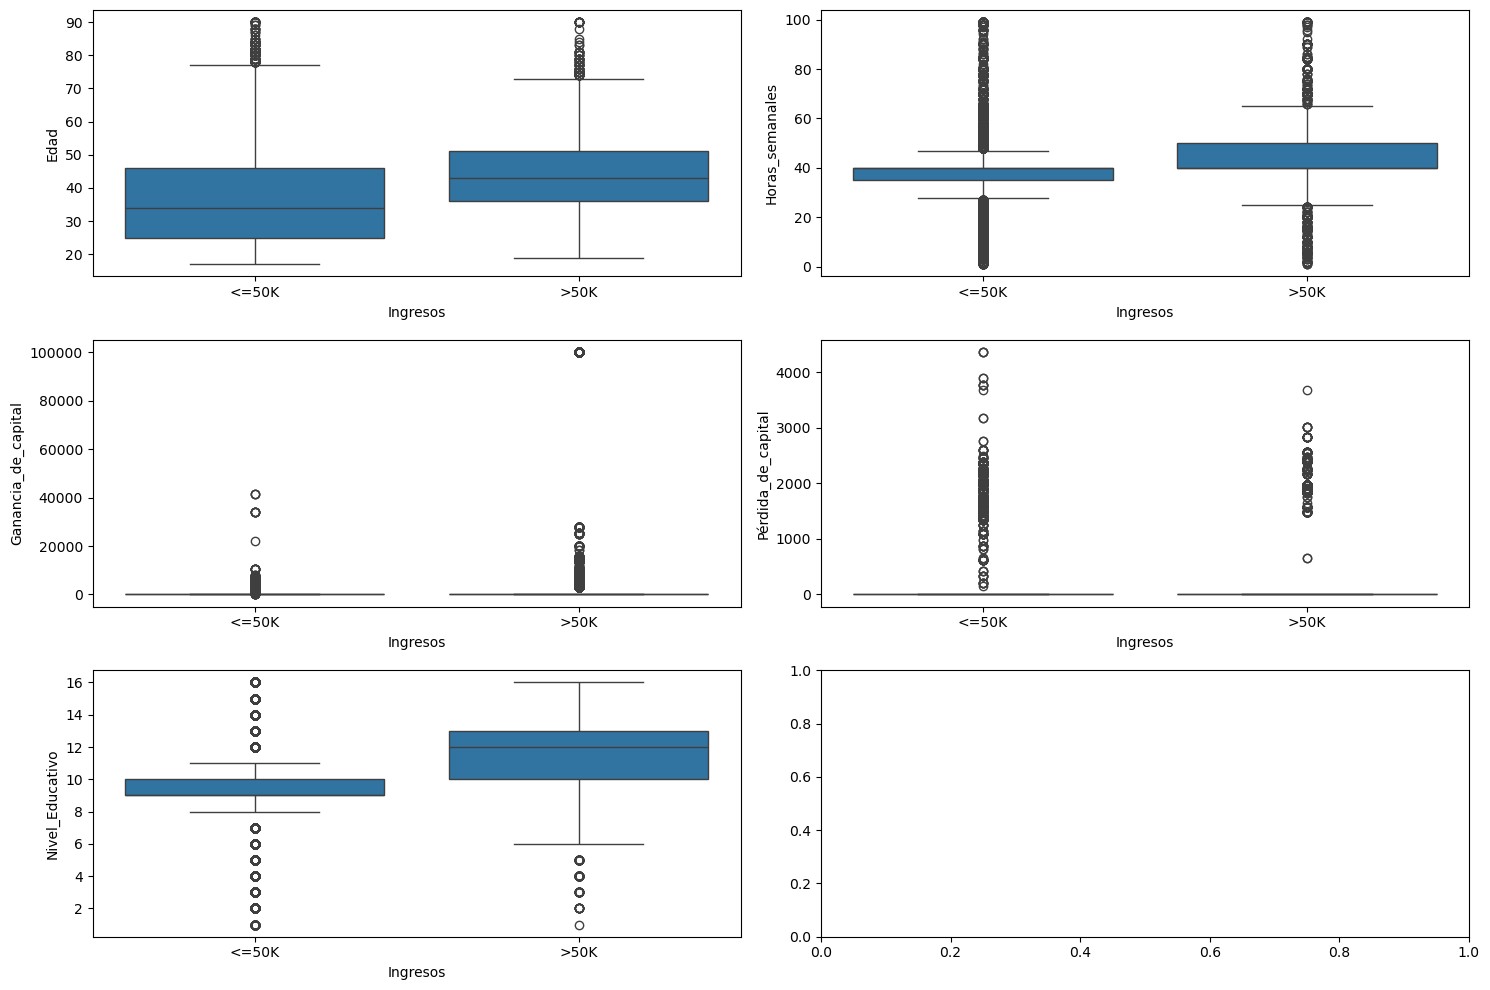

C:\Users\modos\AppData\Local\Temp\ipykernel_13144\3184898754.py:14: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



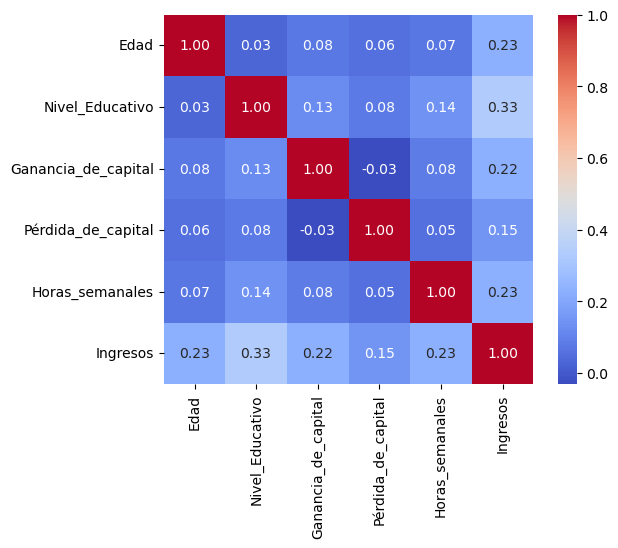

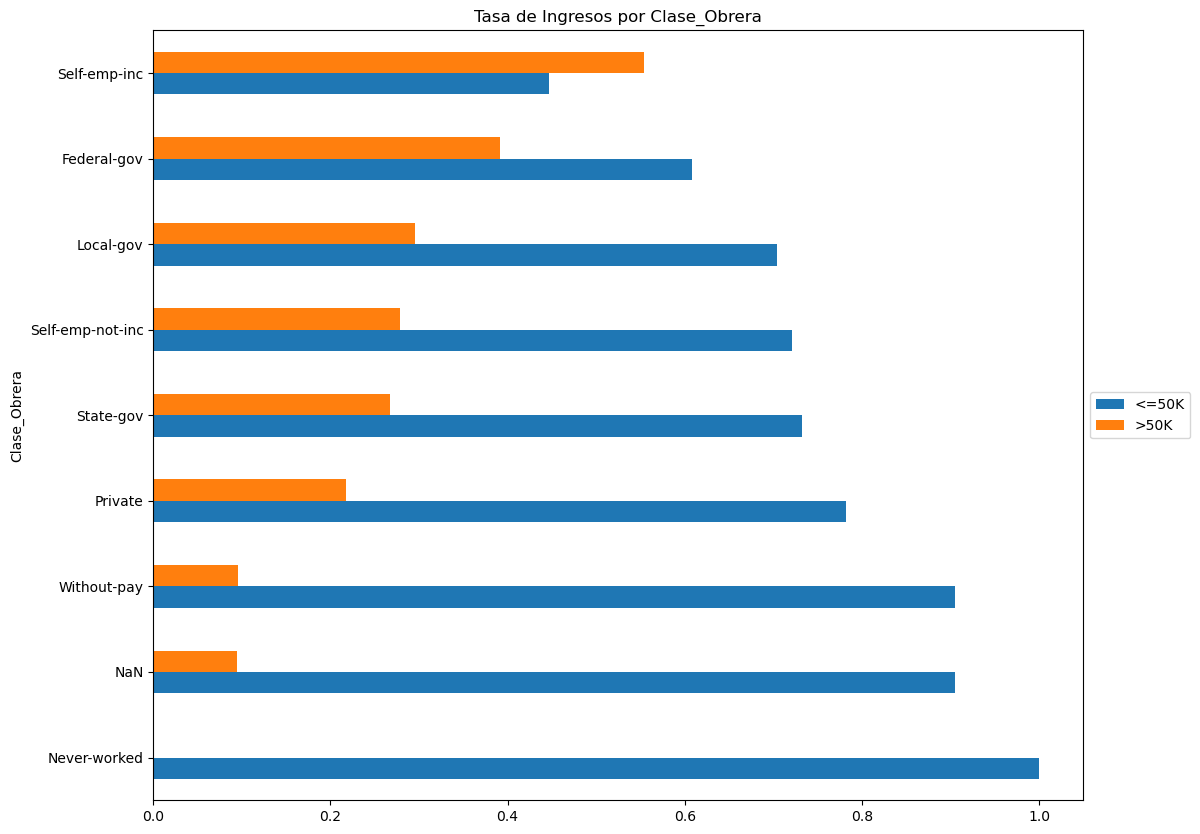

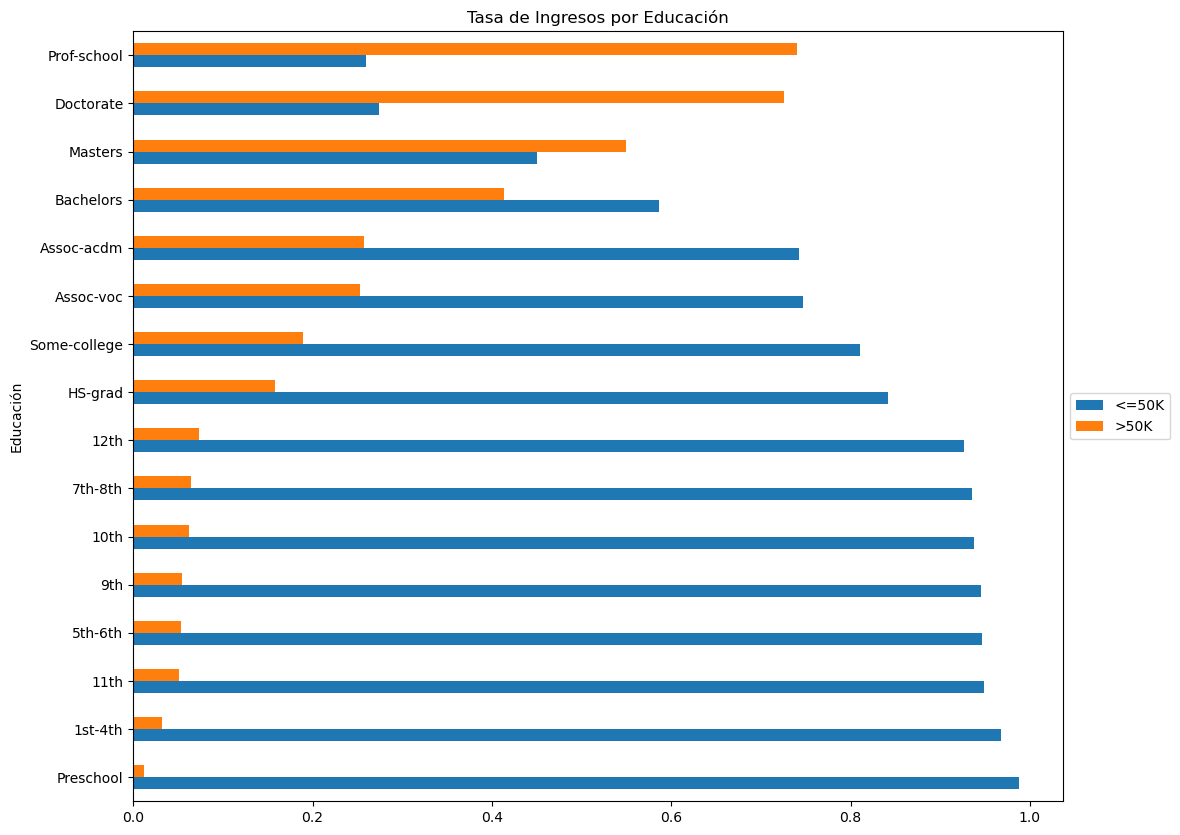

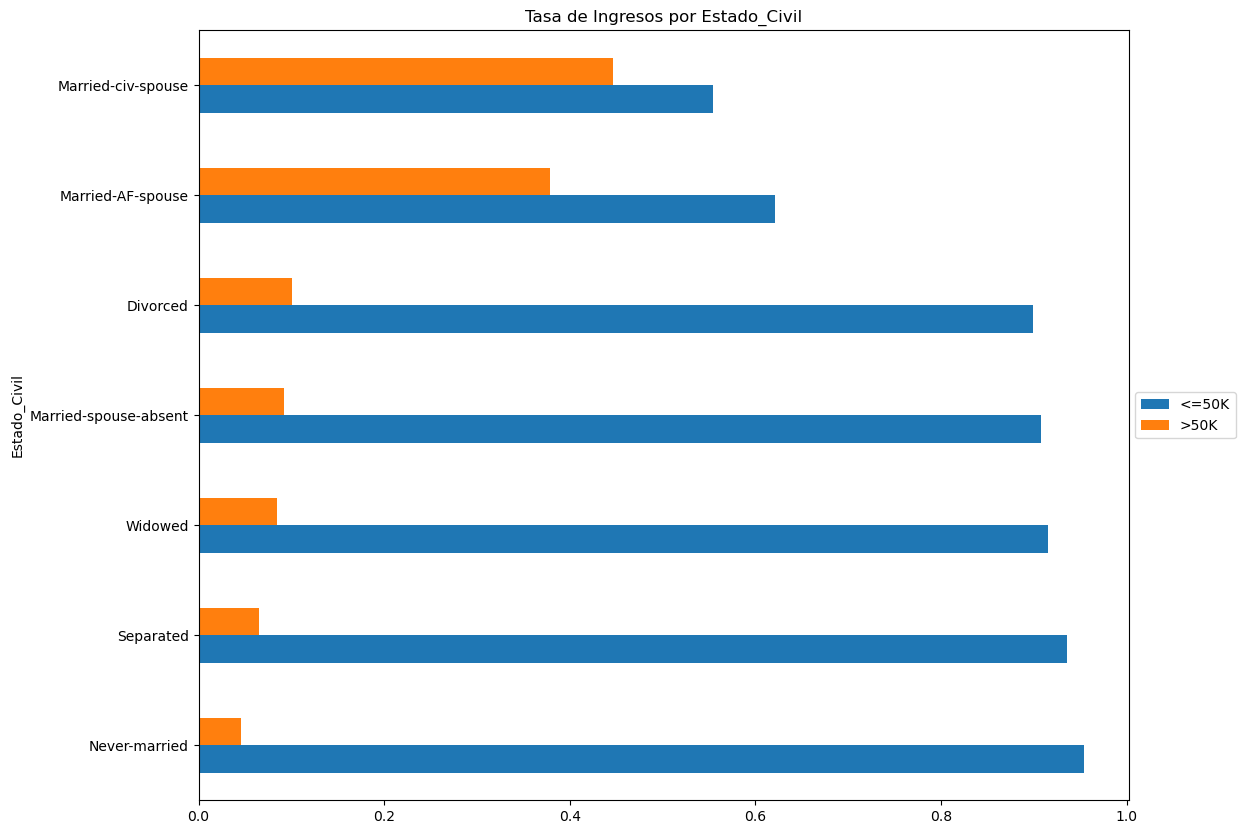

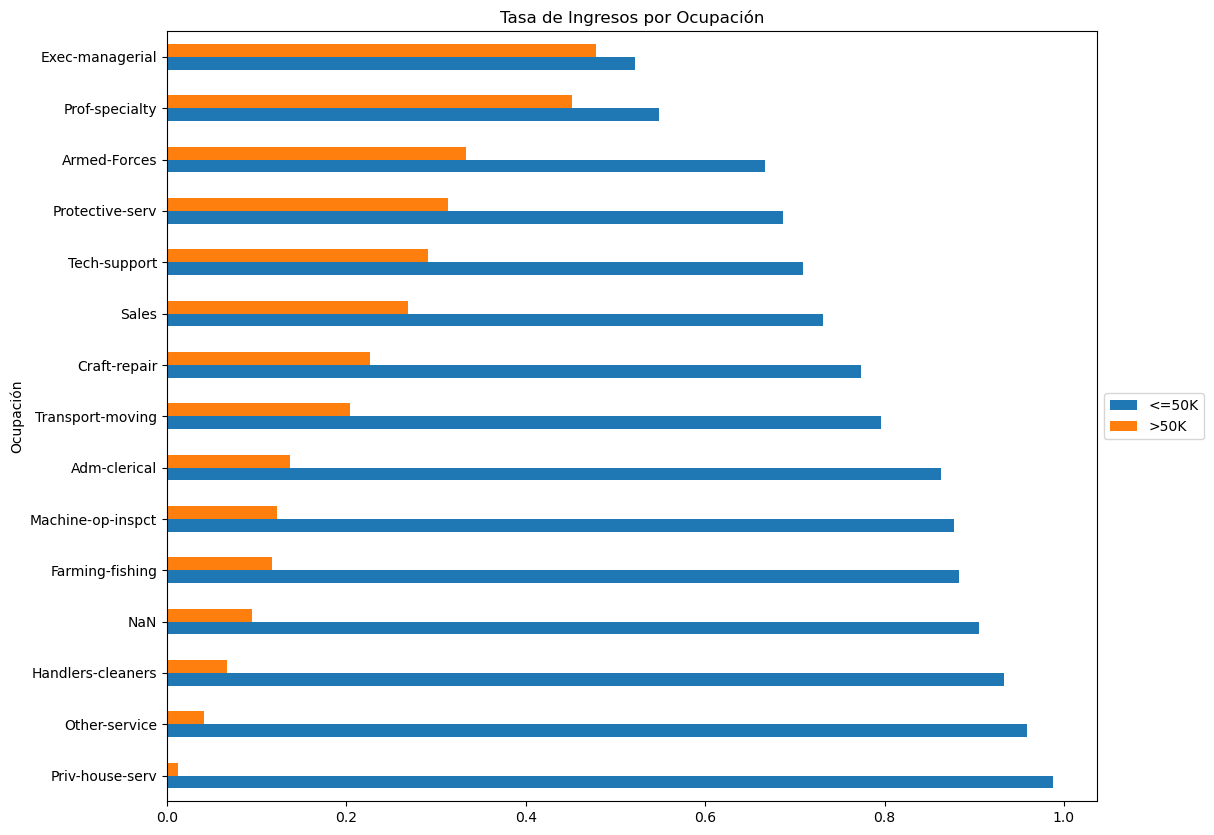

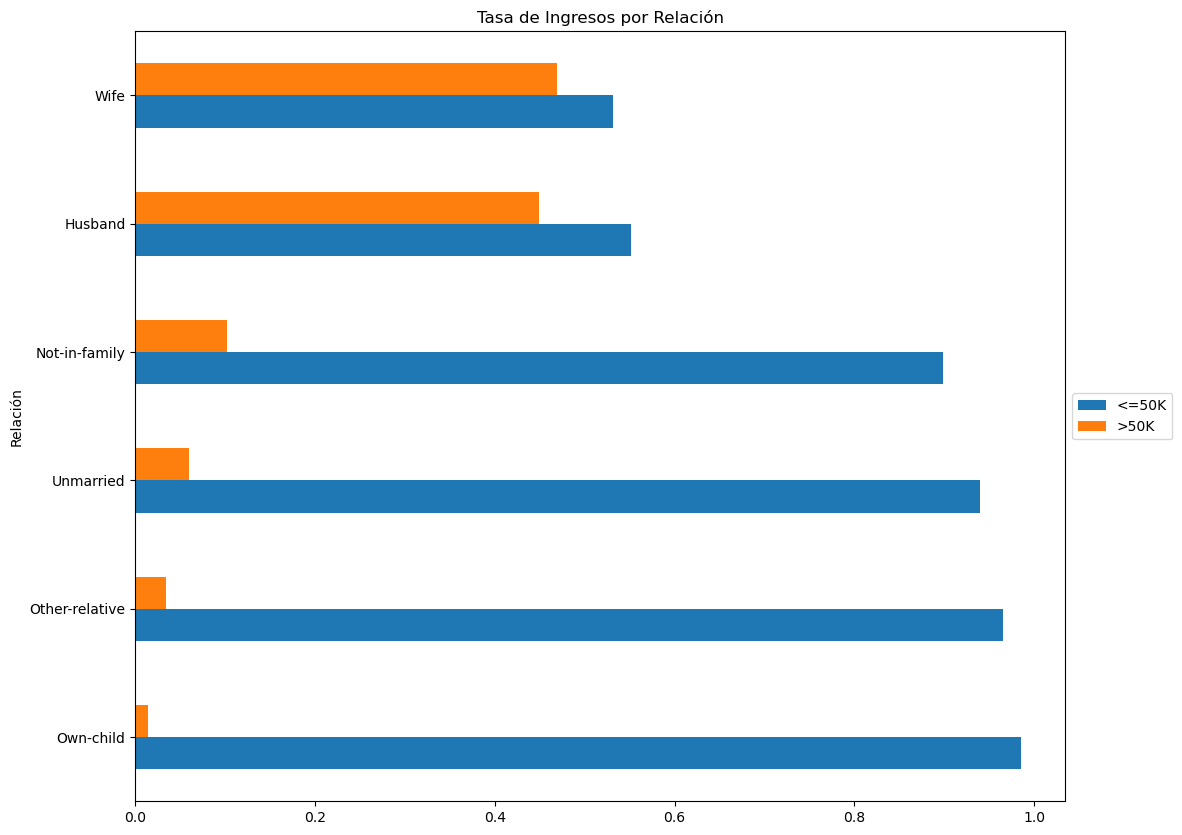

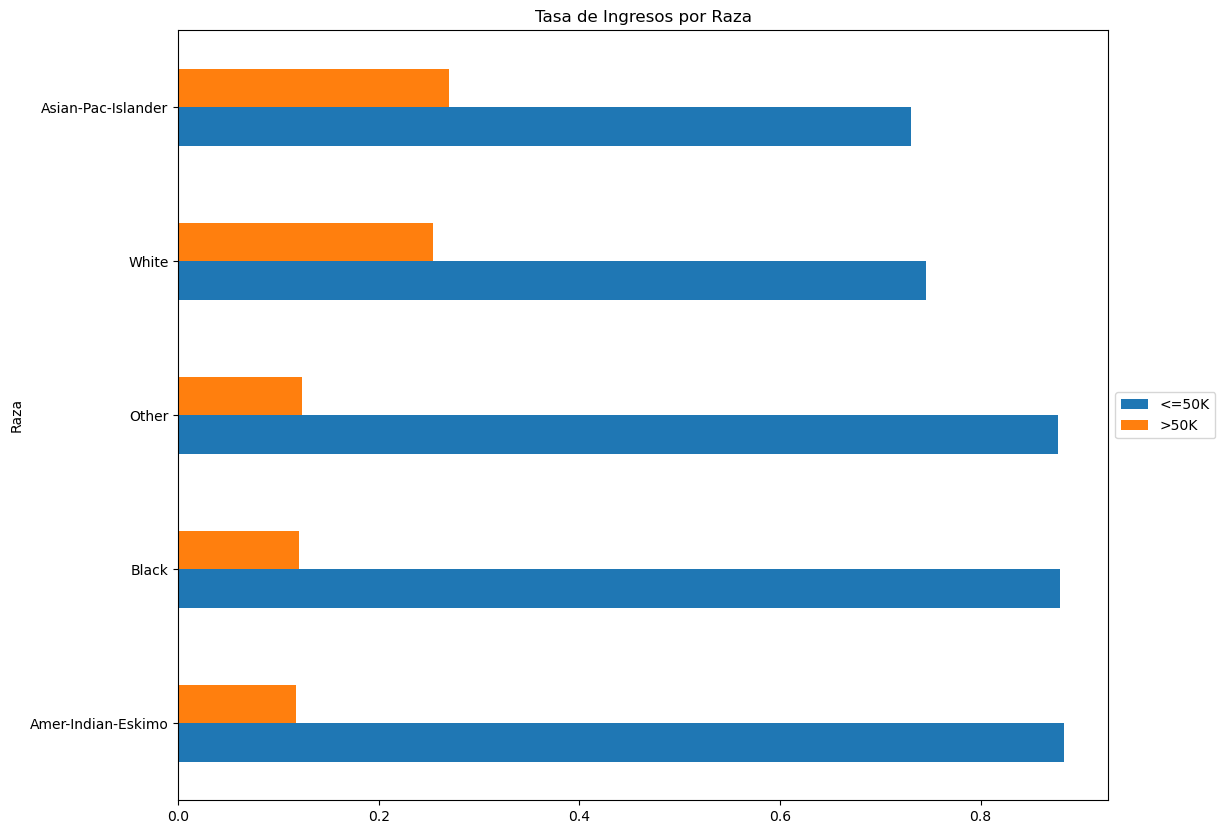

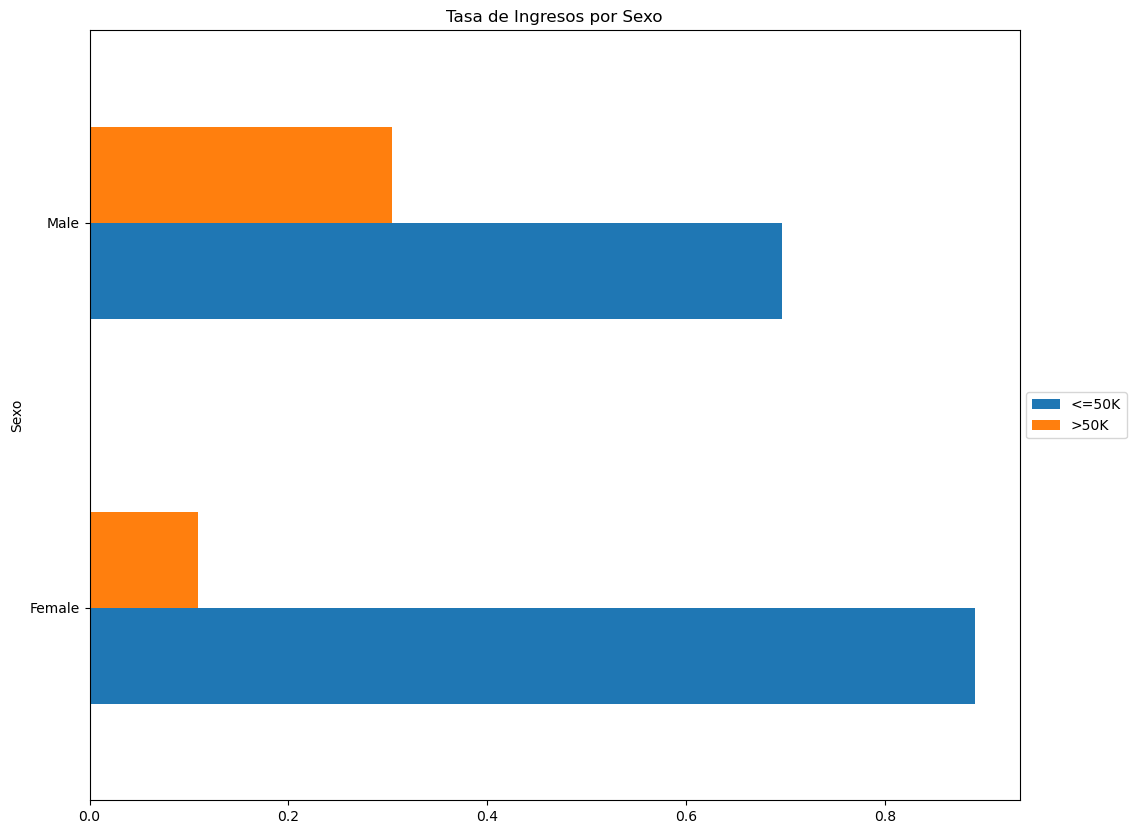

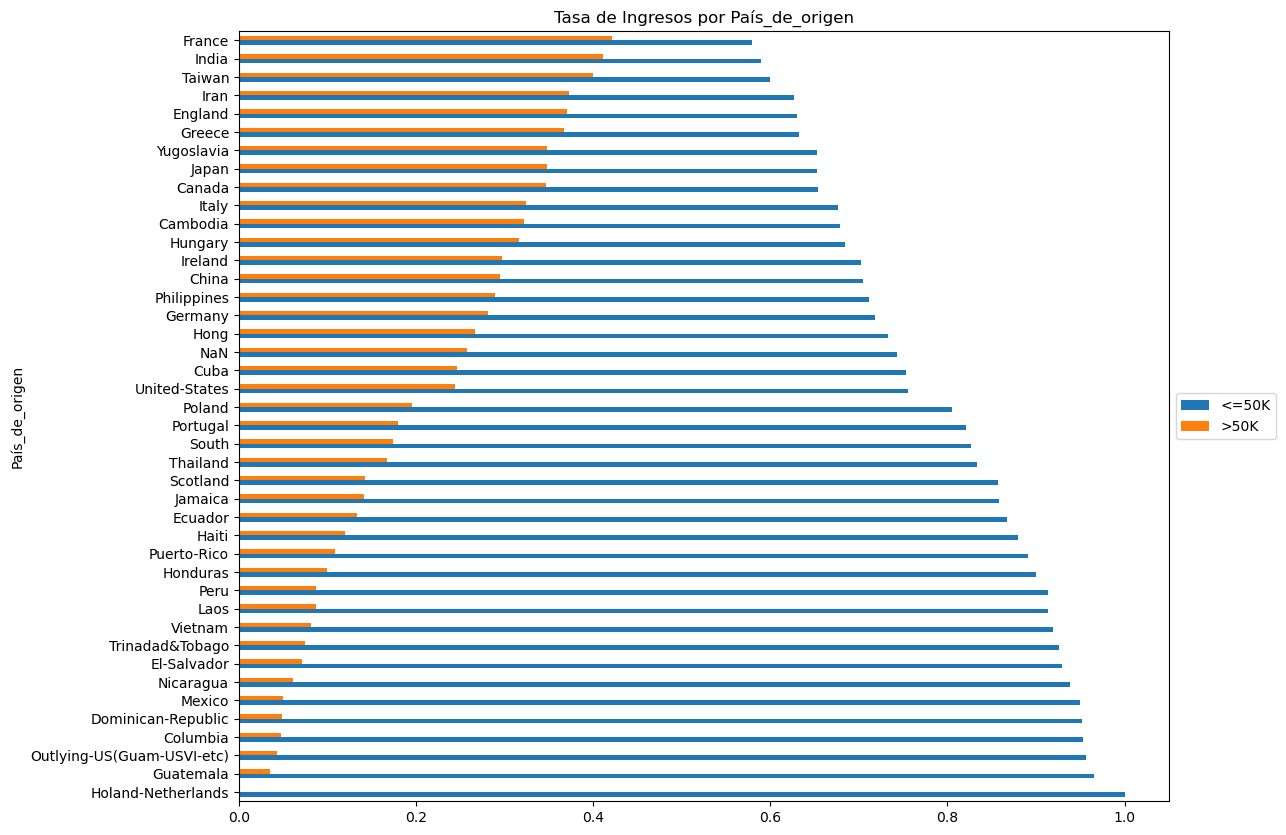

Regitros antes de eliminar los valores faltantes: 48790
Regitros después de eliminar los valores faltantes: 45175


In [3]:
%run 3-EDA.ipynb

## 4. Codificación de las variables

### Codificar la variable objetivo

In [4]:
# Codificar la variable objetivo "Ingresos"
df_income['Ingresos'] = df_income['Ingresos'].map({'<=50K': 0, '>50K': 1})

# Verificar la codificación
df_income['Ingresos'].value_counts()

Ingresos
0    33973
1    11202
Name: count, dtype: int64

### Codificar las variables categóricas

#### Codificación basada en la frecuencia relativa

In [5]:
def frequency_encoding(column):
    freq_encoding = column.value_counts(normalize=True)
    return column.map(freq_encoding)

# Aplicar la codificación a las columnas categóricas
for col in categorical_columns.drop('Ingresos'):
    df_income[col] = frequency_encoding(df_income[col])

# Verificar la codificación
df_income.head()

,Edad,Clase_Obrera,Educación,Nivel_Educativo,Estado_Civil,Ocupación,Relación,Raza,Sexo,Ganancia_de_capital,Pérdida_de_capital,Horas_semanales,País_de_origen,Ingresos
0,39,0.043077,0.167327,13,0.322457,0.122524,0.258528,0.860188,0.675042,2174,0,40,0.913248,0
1,50,0.084007,0.167327,13,0.465789,0.132374,0.412905,0.860188,0.675042,0,0,13,0.913248,0
2,38,0.736292,0.326951,9,0.139325,0.045268,0.258528,0.860188,0.675042,0,0,40,0.913248,0
3,53,0.736292,0.035838,7,0.465789,0.045268,0.412905,0.093569,0.675042,0,0,40,0.913248,0
4,28,0.736292,0.167327,13,0.465789,0.132839,0.046287,0.093569,0.324958,0,0,40,0.002944,0
